In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron

In [139]:
class Network:
    def __init__(self, eta=0.05, n_iter=10, random_state=1):
        self.perceptrons = []
        self.predicted = []
        for i in range(10):
            self.perceptrons.append(Perceptron(eta0=eta, max_iter=n_iter, random_state=random_state))

    def fit(self, X, Y):
        for i in range(10):
            self.perceptrons[i].fit(X, Y[i])

    def show(self, X):
        fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(5.25, 3))

        for i in range(2):
            for j in range(5):

                letter = X[i * 5 + j]

                for y in range(7):
                    for x in range(5):
                        if letter[y * 5 + x] == 1:
                            ax[i, j].scatter(x, y, marker='s', s=90)

                ax[i, j].invert_yaxis()
                ax[i, j].set_xticklabels([])
                ax[i, j].set_yticklabels([])

        plt.show()
        
    def predict(self, X):
        if len(self.predicted) == 0:
            for i in range(len(self.perceptrons)):
                self.predicted.append(self.perceptrons[i].predict(X))
        else:
            for i in range(len(self.perceptrons)):
                self.predicted[i] = self.perceptrons[i].predict(X)

    def misclassified(self, Y):
        print("misclassified examples: %d" % (np.array(self.predicted) != Y).sum())

    

In [140]:
def damage(X, percent, seed=1):
    rgen = np.random.RandomState(seed)
    result = np.array(X)
    count = int(X.shape[1] * percent / 100)

    for index_example in range(len(X)):
        order = np.sort(rgen.choice(X.shape[1], count, replace=False))
        for index_pixel in order:
            result[index_example][index_pixel] *= -1

    return result

In [141]:
df = pd.read_csv('data.csv', header=None)

In [142]:
X = df.iloc[[5, 10, 11, 12, 14, 16, 17, 19, 22, 24], 0:35].values
Y = df.iloc[0:10, 35:45].values

In [143]:
X

array([[ 1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
         1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,
        -1, -1, -1],
       [ 1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,
         1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,
        -1, -1,  1],
       [ 1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
        -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,
         1,  1,  1],
       [ 1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,
        -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
        -1, -1,  1],
       [-1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
        -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1,
         1,  1, -1],
       [-1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
        -1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,
         1,  1,  1],
       [ 1

In [144]:
Y

array([[ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1,  1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1,  1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1,  1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1,  1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1,  1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1,  1]])

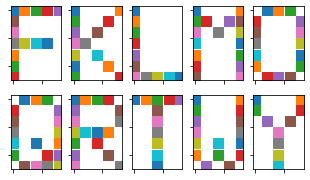

In [145]:
Network().show(X)

In [146]:
network = Network()
network.fit(X, Y)
network.predict(X)

network.predicted

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [147]:
network.misclassified(Y)

misclassified examples: 1


In [148]:
damage5 = damage(X, 5)
damage15 = damage(X, 15)
damage40 = damage(X, 40)

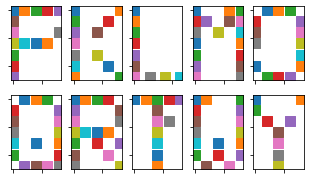

In [149]:
network.show(damage5)

In [150]:
network.predict(damage5)
network.predicted

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([ 1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [151]:
network.misclassified(Y)

misclassified examples: 1


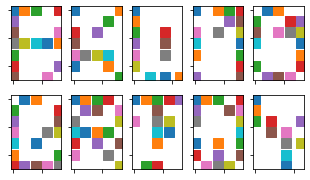

In [152]:
network.show(damage15)

In [153]:
network.predict(damage15)
network.predicted

[array([ 1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [154]:
network.misclassified(Y)

misclassified examples: 6


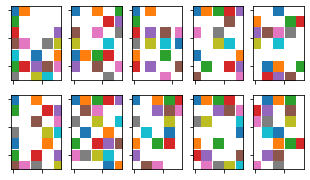

In [155]:
network.show(damage40)

In [156]:
network.predict(damage40)
network.predicted

[array([-1, -1,  1,  1, -1, -1,  1,  1, -1,  1]),
 array([-1, -1,  1, -1, -1, -1,  1, -1, -1,  1]),
 array([-1, -1,  1, -1,  1,  1, -1, -1, -1,  1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1,  1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1,  1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1,  1,  1]),
 array([-1, -1,  1,  1, -1, -1,  1, -1, -1,  1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1,  1]),
 array([ 1,  1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1,  1])]

In [157]:
network.misclassified(Y)

misclassified examples: 30
